Kali ini kita hanya akan menggunakan lima peubah dari dataset `state.x77` dengan peubah Life Exp sebagai peubah respons dan sisanya sebagai peubah penjelas.

In [1]:
import pandas as pd

# URL untuk mengunduh dataset state.x77
url = "https://vincentarelbundock.github.io/Rdatasets/csv/datasets/state.x77.csv"

data = pd.read_csv(url, index_col=0)
data = data.drop(data.columns[[0, 1, 7]], axis=1)
n = data.shape[0]

print(data)

                Illiteracy  Life Exp  Murder  HS Grad  Frost
rownames                                                    
Alabama                2.1     69.05    15.1     41.3     20
Alaska                 1.5     69.31    11.3     66.7    152
Arizona                1.8     70.55     7.8     58.1     15
Arkansas               1.9     70.66    10.1     39.9     65
California             1.1     71.71    10.3     62.6     20
Colorado               0.7     72.06     6.8     63.9    166
Connecticut            1.1     72.48     3.1     56.0    139
Delaware               0.9     70.06     6.2     54.6    103
Florida                1.3     70.66    10.7     52.6     11
Georgia                2.0     68.54    13.9     40.6     60
Hawaii                 1.9     73.60     6.2     61.9      0
Idaho                  0.6     71.87     5.3     59.5    126
Illinois               0.9     70.14    10.3     52.6    127
Indiana                0.7     70.88     7.1     52.9    122
Iowa                   0

# Pemodelan Regresi Linear Berganda

In [2]:
import statsmodels.api as sm

# Menentukan variabel dependen dan independen
X = data[['Illiteracy', 'Murder', 'HS Grad', 'Frost']]
y = data['Life Exp']

X = sm.add_constant(X)
model_le = sm.OLS(y, X).fit()
summary_model = model_le.summary()

print(summary_model)

                            OLS Regression Results                            
Dep. Variable:               Life Exp   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     28.17
Date:                Tue, 25 Feb 2025   Prob (F-statistic):           9.55e-12
Time:                        08:03:10   Log-Likelihood:                -53.817
No. Observations:                  50   AIC:                             117.6
Df Residuals:                      45   BIC:                             127.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         71.5200      1.320     54.162      0.0

Berdasarkan perhitungan, didapat dugaan persamaan regresi linear berganda sebagai berikut. Selain itu, diamati juga bahwa hanya dugaan parameter untuk peubah **Illiteracy** $(\beta_1)$ yang tidak berpengaruh signifikan terhadap peubah respons **Life Exp** dalam taraf nyata $5\%$.

$$
\hat{Y}=71,52-0,18X_1-0,27X_2+0,04X_3-0,01X_4
$$

Sebagaimana yang sudah kita pelajari, untuk mencari nilai dugaan ragam atas dugaan persamaan, kita dapat menghitung nilai Kuadrat Tengah Sisaan melalui tabel ANOVA sebagai berikut.

In [3]:
from statsmodels.formula.api import ols
model_le = ols('y ~ X', data=data).fit()

anova_model = sm.stats.anova_lm(model_le)
print("ANOVA Model:\n", anova_model)

ANOVA Model:
             df     sum_sq    mean_sq          F        PR(>F)
X          5.0  63.225165  12.645033  22.580605  2.922576e-11
Residual  45.0  25.199789   0.559995        NaN           NaN


In [4]:
KTG = round(anova_model['mean_sq'].iloc[1], 2)
print("Nilai KTG:", KTG)

Nilai KTG: 0.56


Dari tabel ANOVA di atas, dapat diduga ragam dugaan persamaan melalui nilai **Mean Square Residuals**, yaitu senilai $0,56$. Hubungan antara keduanya dapat dituliskan sebagai berikut.

$$
\hat\sigma^2=KTG=0,56
$$

# Uji Hipotesis Parameter Regresi

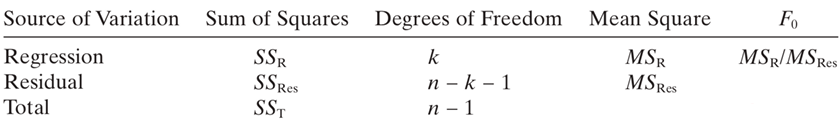

In [5]:
from IPython.display import Image, display
display(Image("C:/Users/faeri/OneDrive/Pictures/Screenshot/Screenshot 2025-02-24 233104.png"))

In [6]:
model_le = sm.OLS(y, X).fit()

# Rata-rata total
Y_bar = y.mean()

# Total Sum of Squares (SST)
SST = sum((y - Y_bar) ** 2)

# Model Sum of Squares (SSM)
Y_hat = model_le.predict(X)
SSM = sum((Y_hat - Y_bar) ** 2)

# Residual Sum of Squares (SSR)
SSR = SST - SSM

# Derajat Kebebasan
n = len(data)  # Jumlah observasi
k = len(model_le.params)  # Jumlah variabel independen + 1 untuk intercept
df_model = k - 1
df_residual = n - k

# Mean Squares
MSM = SSM / df_model
MSR = SSR / df_residual

# F-statistic
F_statistic = MSM / MSR

# Tabel Sidik Ragam
anova_table = pd.DataFrame({
    'Sumber_Variasi': ['Model', 'Residual', 'Total'],
    'SS': [SSM, SSR, SST],
    'df': [df_model, df_residual, n - 1],
    'MS': [MSM, MSR, None],
    'F': [F_statistic, None, None]
})

# Menampilkan tabel ANOVA
print(anova_table)

  Sumber_Variasi         SS  df         MS          F
0          Model  63.099213   4  15.774803  28.169527
1       Residual  25.199789  45   0.559995        NaN
2          Total  88.299002  49        NaN        NaN


## Uji Simultan

$$
H_0:\beta_1=\beta_2=\beta_3=...=\beta_k=0
$$

Semua peubah penjelas $x_1,x_2,...,x_k$ tidak berpengaruh linear terhadap peubah respon

$$
H_1:\beta_j\neq0{\space}untuk{\space}suatu{\space}j,j=1,2,...,k
$$

Minimal terdapat satu peubah penjelas yang bepengaruh linear terhadap peubah respon

In [7]:
from scipy.stats import f

# Tentukan tingkat signifikansi
alpha = 0.05

# Hitung nilai F-tabel
F_tabel = f.ppf(1 - alpha, df_model, df_residual)

# Bandingkan F-hitung dengan F-tabel
if F_statistic > F_tabel:
    print("F-hitung lebih besar dari F-tabel. Tolak hipotesis nol.")
else:
    print("F-hitung tidak lebih besar dari F-tabel. Gagal menolak hipotesis nol.")

# Tampilkan hasil
print("F-hitung:", F_statistic)
print("F-tabel:", F_tabel)

F-hitung lebih besar dari F-tabel. Tolak hipotesis nol.
F-hitung: 28.16952695505592
F-tabel: 2.5787391843115586


Ada bukti yang cukup untuk menyatakan bahwa setidaknya satu dari variabel independen dalam model regresi berkontribusi secara signifikan terhadap variabel dependen. Dengan kata lain, model regresi signifikan secara statistik.

## Uji Parsial

$$
H_0:\beta_j=0
$$

Peubah penjelas $x_j$ tidak berpengaruh terhadap peubah respon

$$
H_1:\beta_j\neq0
$$

Peubah penjelas $x_j$ bepengaruh terhadap peubah respon, setelah peubah penjelas lainnya ada dalam model

In [8]:
from scipy import stats

# Menentukan tingkat signifikansi
alpha = 0.05

# Menghitung t-hitung dan membandingkannya dengan t-tabel untuk setiap koefisien
for i in range(1, len(model_le.params)):  # Mulai dari 1 untuk menghindari intercept
    beta_hat = model_le.params.iloc[i]  # Koefisien
    SE_beta_hat = model_le.bse.iloc[i]  # Standar error
    
    # Hitung t-hitung
    t_hitung = abs(beta_hat / SE_beta_hat)
    
    # Hitung nilai t-tabel
    t_tabel = stats.t.ppf(1 - alpha/2, df=model_le.df_resid)  # Dua sisi
    
    # Bandingkan t-hitung dengan t-tabel
    if t_hitung > t_tabel:
        print(f"t-hitung untuk koefisien {model_le.params.index[i]} lebih besar dari t-tabel. Tolak hipotesis nol.")
    else:
        print(f"t-hitung untuk koefisien {model_le.params.index[i]} tidak lebih besar dari t-tabel. Gagal menolak hipotesis nol.")
    
    # Tampilkan hasil
    print(f"t-hitung: {t_hitung:.4f}, t-tabel: {t_tabel:.4f}\n")

t-hitung untuk koefisien Illiteracy tidak lebih besar dari t-tabel. Gagal menolak hipotesis nol.
t-hitung: 0.5539, t-tabel: 2.0141

t-hitung untuk koefisien Murder lebih besar dari t-tabel. Tolak hipotesis nol.
t-hitung: 6.6391, t-tabel: 2.0141

t-hitung untuk koefisien HS Grad lebih besar dari t-tabel. Tolak hipotesis nol.
t-hitung: 2.5322, t-tabel: 2.0141

t-hitung untuk koefisien Frost lebih besar dari t-tabel. Tolak hipotesis nol.
t-hitung: 2.7153, t-tabel: 2.0141



Dapat disimpulkan bahwa peubah Murder, HS Grad, dan Frost memiliki pengaruh yang signifikan terhadap variabel dependen, sedangkan variabel Illiteracy tidak memiliki pengaruh yang signifikan.

# Ukuran Kebaikan Model

## $R^2$

Pada regresi linier berganda, $R=\sqrt{R^2}$ disebut sebagai *multiple correlation coefficient*, mengukur hubungan antara peubah respon $y$ dengan satu set peubah penjelas $x_1,x_2,…,x_k$.

In [9]:
# Menghitung R-squared
R_sq = 1 - (SSR / SST)
print(f"R^2: {R_sq:.4f}")

R^2: 0.7146


$71\%$ dari propori keragaman total peubah respon dapat dijelaskan oleh seluruh peubah penjelas.

## $Adj. R^2$

$Adj. R^2$ terkadang digunakan untuk membandingkan beberapa model dengan banyak peubah penjelas berbeda, namun tidak dapat diinterpretasikan sebagai proporsi keragaman total dalam $y$ yang diterangkan oleh peubah predictor/penjelas.

In [10]:
# Menghitung Adjusted R-squared
n = len(y)  # Jumlah observasi
k = len(model_le.params)  # Jumlah koefisien (termasuk intercept)
adj_R_sq = 1 - ((1 - R_sq) * (n - 1) / (n - k - 1))
print(f"Adjusted R^2: {adj_R_sq:.4f}")

Adjusted R^2: 0.6822


$68.22\%$ dari variasi dalam variabel dependen dapat dijelaskan oleh variabel independen, dengan mempertimbangkan jumlah variabel dalam model.

# Dugaan Keragaman Parameter

Keragaman pada tiap dugaan parameter perlu dihitung guna menentukan selang kepercayaan dan pengujian signifikansi parameter itu sendiri. Secara umum, nilai ragam dugaan parameter $\hat\beta_j$ dapat dihitung melalui rumus berikut.

$$
Var(\hat\beta_j)=\sigma^2C_{jj}
$$

dengan nilai matriks $C$ dapat diperoleh melalui rumus berikut.

$$
C=(X'X)^{-1}
$$

## Pembentukan Matriks $c_{ii}$

Terlebih dahulu perlu dibentuk matriks $X$ seperti berikut.

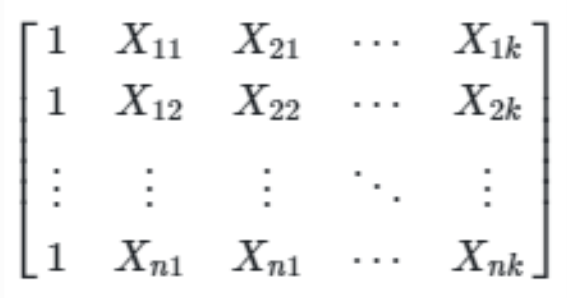

In [11]:
from IPython.display import Image, display
display(Image("C:/Users/faeri/OneDrive/Pictures/Screenshot/Screenshot 2025-02-24 222206.png"))

In [12]:
import numpy as np

n = data.shape[0]
x0 = np.ones(n)

# Membuat DataFrame
x = pd.DataFrame({
    'Intercept': x0,
    'Illiteracy': data['Illiteracy'],
    'Murder': data['Murder'],
    'HS Grad': data['HS Grad'],
    'Frost': data['Frost']
})
print(x)

                Intercept  Illiteracy  Murder  HS Grad  Frost
rownames                                                     
Alabama               1.0         2.1    15.1     41.3     20
Alaska                1.0         1.5    11.3     66.7    152
Arizona               1.0         1.8     7.8     58.1     15
Arkansas              1.0         1.9    10.1     39.9     65
California            1.0         1.1    10.3     62.6     20
Colorado              1.0         0.7     6.8     63.9    166
Connecticut           1.0         1.1     3.1     56.0    139
Delaware              1.0         0.9     6.2     54.6    103
Florida               1.0         1.3    10.7     52.6     11
Georgia               1.0         2.0    13.9     40.6     60
Hawaii                1.0         1.9     6.2     61.9      0
Idaho                 1.0         0.6     5.3     59.5    126
Illinois              1.0         0.9    10.3     52.6    127
Indiana               1.0         0.7     7.1     52.9    122
Iowa    

In [13]:
p = x.shape[1]
print("Dimensi matriks c:", x.shape)

Dimensi matriks c: (50, 5)


Matriks $X$ yang terbentuk memiliki dimensi $50×5$ sebagai representasi dari jumlah amatan $(n=50)$ dan jumlah parameter yang ingin diduga $(p=5)$. Selanjutnya dilakukan perkalian matriks untuk mendapatkan matriks $C_{p×p}$.

In [14]:
x_matrix = x.values
c = pd.DataFrame(np.linalg.inv(np.dot(x_matrix.T, x_matrix)))
print(c)

          0         1         2         3         4
0  3.113753 -0.511080 -0.017516 -0.038033 -0.003319
1 -0.511080  0.191936 -0.010513  0.005262  0.000810
2 -0.017516 -0.010513  0.003022  0.000087  0.000028
3 -0.038033  0.005262  0.000087  0.000563  0.000013
4 -0.003319  0.000810  0.000028  0.000013  0.000014


In [15]:
print("Dimensi matriks c:", c.shape)

Dimensi matriks c: (5, 5)


## Selang Kepercayaan Parameter $\beta_0$

Sebelumnya, melalui fungsi `ols()`, kita sudah mendapatkan nilai dugaan parameter $\beta_0$ dan $\beta_1$ sebesar $71,52$ dan $-0,18$. Kedua nilai dapat kita definisikan sebagai berikut.

In [16]:
b0 = model_le.params.iloc[0]  
b1 = model_le.params.iloc[1]

print("Koefisien b0:", b0)
print("Koefisien b1:", b1)

Koefisien b0: 71.51995846872413
Koefisien b1: -0.18160777545669143


Selanjutnya kita dapat menghitung nilai galat baku dari dugaan parameter $\beta_0$ tersebut dengan perhitungan sebagai berikut.

$$
s_{\hat\beta_0}=\hat\sigma\sqrt{c_{00}}
$$

Kita dapat mengidentifikasi nilai $c_{00}$ pada indeks matriks `c[1,1]` dilanjut dengan melakukan perhitungan galat bakunya.

In [17]:
c = np.linalg.inv(X.T @ X)
c00 = c[0,0]
print("c00:", c00)

c00: 3.1137532062147564


In [18]:
se_b0 = np.sqrt(KTG * c00)
print("se_b0:", se_b0)

se_b0: 1.3204930122799832


In [19]:
# Menentukan tingkat signifikansi
alpha = 0.05

# Menghitung batas bawah dan batas atas untuk b0
n = len(data)  # Jumlah observasi
p = len(model_le.params)  # Jumlah parameter (koefisien)

# Batas Bawah beta0
bb_b0 = b0 - abs(stats.t.ppf(1 - alpha / 2, df=n - p)) * se_b0

# Batas Atas beta0
ba_b0 = b0 + abs(stats.t.ppf(1 - alpha / 2, df=n - p)) * se_b0

# Menampilkan hasil
print(f"Batas Bawah beta0: {bb_b0}")
print(f"Batas Atas beta0: {ba_b0}")

Batas Bawah beta0: 68.86034901769753
Batas Atas beta0: 74.17956791975072


Dengan cara yang sama seperti yang kita lakukan ketika menghitung nilai selang kepercayaan dugaan parameter analisis regresi linear sederhana, kita dapati selang kepercayaan untuk $\hat\beta_0$ sebagai berikut.

$$
68,86<\hat\beta_0<74,18
$$

## Selang Kepercayaan Parameter $\beta_1$

Untuk menghitung dugaan galat baku dari duaan parameter $\beta_1$, kita dapat menggunakan rumus berikut.

$$
s_{\hat\beta_1}=\hat\sigma\sqrt{c_{11}}
$$

Kita dapat mengidentifikasi nilai $c_{11}$ pada indeks matriks `c[2,2]` dilanjut dengan melakukan perhitungan galat bakunya.

In [20]:
c = np.linalg.inv(X.T @ X)
c11 = c[1,1]
print("c11:", c11)

c11: 0.1919356370914804


In [21]:
se_b1 = np.sqrt(KTG * c11)
print("se_b1:", se_b1)

se_b1: 0.32784745960771


In [22]:
# Menentukan tingkat signifikansi
alpha = 0.05

# Menghitung batas bawah dan batas atas untuk b0
n = len(data)  # Jumlah observasi
p = len(model_le.params)  # Jumlah parameter (koefisien)

# Batas Bawah beta0
bb_b1 = b1 - abs(stats.t.ppf(1 - alpha / 2, df=n - p)) * se_b1

# Batas Atas beta0
ba_b1 = b1 + abs(stats.t.ppf(1 - alpha / 2, df=n - p)) * se_b1

# Menampilkan hasil
print(f"Batas Bawah beta0: {bb_b1}")
print(f"Batas Atas beta0: {ba_b1}")

Batas Bawah beta0: -0.8419264548885566
Batas Atas beta0: 0.47871090397517363


Dengan demikian, kita dapat selang kepercayaan untuk $\hat\beta_1$ sebagai berikut.

$$
-0,84<\hat\beta_1<0,48
$$

Pada kasus selang kepercayaan untuk $\hat\beta_1$ di atas, didapati bahwa dugaan parameter berada dalam rentang yang mengandung nilai 0. Dengan demikian, dapat dimaknai bahwa diduga nilai parameter berada dalam rentang yang mengandung nilai 0. Dengan demikian, dapat dimaknai bahwa didgua nilai parameter $\beta_1$ bernilai 0 atau tidak signifikan dalam taraf nyata $5\%$. Hal ini juga terkonfirmasi dalam output fungsi `ols()` di atas yang menunjukkan bahwa dugaan parameter $\hat\beta_1$ tidak signifikan (p-value > $\alpha=0.05$).

# Penduga Keragaman dan Selang Kepercayaan Seluruh Parameter

Untuk mempermudah pendugaan keragaman dan selang kepercayaan parameter, dapat dibentuk fungsi sebagai berikut.

In [23]:
def hitung_se_sk(model, n, p, c, ragam, alpha=0.05):
    galat_baku = pd.DataFrame(columns=['parameter', 'galat_baku'])
    selang_kepercayaan = pd.DataFrame(columns=['batas_bawah', 'parameter', 'batas_atas'])
    
    for i in range(len(model.params)):
        b = model.params.iloc[i]  # Koefisien
        c_ii = c[i, i]  # Varians dari koefisien
        se_b = np.sqrt(ragam * c_ii)  # Standar error
        
        # Hitung batas bawah dan batas atas
        bb_b = b - abs(stats.t.ppf(alpha / 2, df=n - p)) * se_b
        ba_b = b + abs(stats.t.ppf(alpha / 2, df=n - p)) * se_b
        
        # Menyimpan hasil
        galat_baku.loc[len(galat_baku)] = {'parameter': model.params.index[i], 'galat_baku': se_b}
        selang_kepercayaan.loc[len(selang_kepercayaan)] = {'batas_bawah': bb_b, 'parameter': model.params.index[i], 'batas_atas': ba_b}
    
    return {'galat_baku': galat_baku, 'selang_kepercayaan': selang_kepercayaan}

Fungsi di atas memberikan output berupa tabel nilai galat baku dan selang kepercayaan tiap dugaan parameter yang dapat diamati di bawah.

In [24]:
hasil = hitung_se_sk(model=model_le, n=n, p=p, c=c, ragam=KTG)

# Menampilkan galat baku
galat_baku = hasil['galat_baku']
print("Galat Baku:\n", galat_baku)

Galat Baku:
     parameter  galat_baku
0       const    1.320493
1  Illiteracy    0.327847
2      Murder    0.041138
3     HS Grad    0.017760
4       Frost    0.002828


In [25]:
# Menampilkan selang kepercayaan
selang_kepercayaan = hasil['selang_kepercayaan']
print("\nSelang Kepercayaan:\n", selang_kepercayaan)


Selang Kepercayaan:
    batas_bawah   parameter  batas_atas
0    68.860349       const   74.179568
1    -0.841926  Illiteracy    0.478711
2    -0.355974      Murder   -0.190262
3     0.009200     HS Grad    0.080739
4    -0.013374       Frost   -0.001983
